
(50000, 32, 32, 3)
(10000, 32, 32, 3)


<keras.src.engine.input_layer.InputLayer object at 0x000002C6567CBF50> False
<keras.src.layers.convolutional.conv2d.Conv2D object at 0x000002C689F84250> False
<keras.src.layers.convolutional.conv2d.Conv2D object at 0x000002C68B01A890> False
<keras.src.layers.pooling.max_pooling2d.MaxPooling2D object at 0x000002C689F51DD0> False
<keras.src.layers.convolutional.conv2d.Conv2D object at 0x000002C689F6E190> False
<keras.src.layers.convolutional.conv2d.Conv2D object at 0x000002C68AFE5150> False
<keras.src.layers.pooling.max_pooling2d.MaxPooling2D object at 0x000002C689F323D0> False
<keras.src.layers.convolutional.conv2d.Conv2D object at 0x000002C68B018410> False
<keras.src.layers.convolutional.conv2d.Conv2D object at 0x000002C656D9C110> False
<keras.src.layers.convolutional.conv2d.Conv2D object at 0x000002C66013C650> False
<keras.src.layers.pooling.max_pooling2d.MaxPooling2D object at 0x000002C689F53D50> False
<keras.src.layers.convolutional.conv2d.Co

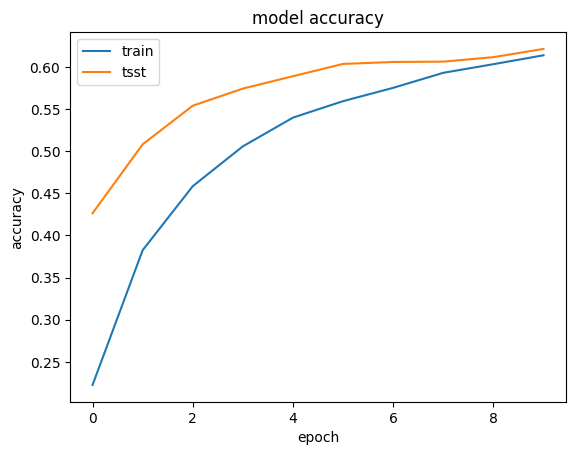

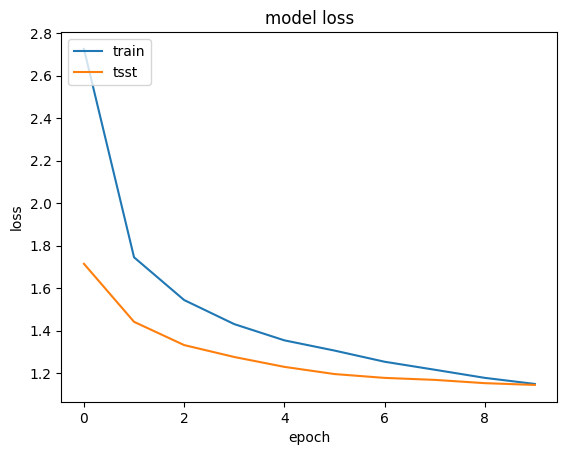

In [1]:
#پروژه ششم بوت کمپ بر روی دیتاست CIFAR10 ,models = VGG16
import tensorflow as tf
from tensorflow import keras
from keras.datasets import cifar10
from keras.utils import to_categorical
import matplotlib.pyplot as plt
from keras.applications.vgg16 import preprocess_input
(x_train,y_train),(x_test,y_test) = cifar10.load_data()

print(x_train.shape)
print(x_test.shape)

import numpy as np
import cv2

lst1=[]
lst2=[]
for i in x_train:
    lst1.append(cv2.resize(i,(64,64),interpolation = cv2.INTER_AREA))
for i in x_test:
    lst2.append(cv2.resize(i,(64,64),interpolation = cv2.INTER_AREA))

from keras.applications import VGG16

vgg_conv = VGG16(weights='imagenet',include_top=False,input_shape=(32,32,3))
for layer in vgg_conv.layers:
    layer.trainable = False

for layer in vgg_conv.layers:
    print(layer , layer.trainable)
    #network = models.Sequential()
model = keras.Sequential()
model.add(vgg_conv)

model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(units=256,activation='relu'))
model.add(keras.layers.Dropout(0.3))
model.add(keras.layers.Dense(units=128,activation='relu'))
model.add(keras.layers.Dropout(0.3))
model.add(keras.layers.Dense(units=64,activation='relu'))
model.add(keras.layers.Dropout(0.3))
model.add(keras.layers.Dense(units=10,activation='softmax'))

model.summary()
model.compile(optimizer=tf.optimizers.Adam(),loss=tf.losses.sparse_categorical_crossentropy,metrics=['accuracy'])

history=model.fit(x_train,y_train,epochs=10,batch_size=128,validation_data=(x_test,y_test))

print(history.history.keys())
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','tsst'],loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','tsst'],loc='upper left')
plt.show()